# Cryptocurrency Price Prediction - Quant Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Importing the training set

In [51]:
dataset_train1 = pd.read_csv('QNTTrain1.csv')
dataset_train2 = pd.read_csv('QNTTrain2.csv')
training_set1 = dataset_train1.iloc[:153, 1:2]
training_set2 = dataset_train2.iloc[:, 2:3]
data = training_set1.append(training_set2)

In [52]:
data.shape

(998, 1)

In [53]:
data.head()

,Open
0,0.287844
1,0.252366
2,0.269138
3,0.248117
4,0.244754


In [54]:
data.tail()

,Open
840,41.07
841,40.46
842,40.37
843,41.30
844,44.44


In [55]:
data.isnull().any()

Open    False
dtype: bool

In [56]:
training_set = data.iloc[:, :].values

### Feature Scaling

In [57]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [58]:
X_train = []
y_train = []
for i in range(60, 998):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [59]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Initialising the RNN

In [61]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [62]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [63]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [64]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [65]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [66]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [67]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [68]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 53s 155ms/step - loss: 0.0406
Epoch 2/100
30/30 [==============================] - 5s 154ms/step - loss: 0.0052
Epoch 3/100
30/30 [==============================] - 4s 144ms/step - loss: 0.0043
Epoch 4/100
30/30 [==============================] - 4s 148ms/step - loss: 0.0054
Epoch 5/100
30/30 [==============================] - 5s 167ms/step - loss: 0.0044
Epoch 6/100
30/30 [==============================] - 4s 148ms/step - loss: 0.0035
Epoch 7/100
30/30 [==============================] - 4s 146ms/step - loss: 0.0029
Epoch 8/100
30/30 [==============================] - 5s 157ms/step - loss: 0.0038 1s - 
Epoch 9/100
30/30 [==============================] - 5s 154ms/step - loss: 0.0027
Epoch 10/100
30/30 [==============================] - 4s 146ms/step - loss: 0.0025
Epoch 11/100
30/30 [==============================] - 4s 146ms/step - loss: 0.0021
Epoch 12/100
30/30 [==============================] - 5s 165ms/step - loss: 0.0031
Epoch 

## Part 3 - Making the predictions and visualising the results

### Getting the real QNT price of May-June 2021

In [145]:
dataset_test = pd.read_csv('QNTTest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted QNT price of  May-June 2021

In [146]:
dataset_total = pd.concat((data['Open'], dataset_test['Open']), axis = 0)
dataset_array = dataset_total.iloc[59:].values
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 101):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

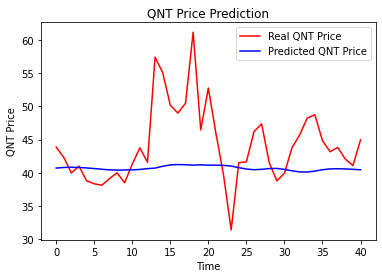

In [147]:
plt.plot(real_stock_price, color = 'red', label = 'Real QNT Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted QNT Price')
plt.title('QNT Price Prediction')
plt.xlabel('Time')
plt.ylabel('QNT Price')
plt.legend()
plt.show()

### Results over whole range

In [148]:
inputs = dataset_total[:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 1040):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

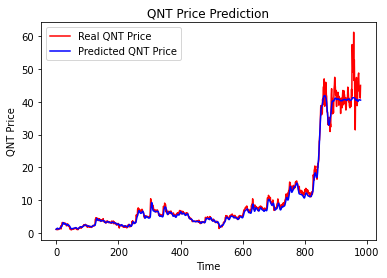

In [149]:
plt.plot(dataset_array, color = 'red', label = 'Real QNT Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted QNT Price')
plt.title('QNT Price Prediction')
plt.xlabel('Time')
plt.ylabel('QNT Price')
plt.legend()
plt.show()